<a href="https://colab.research.google.com/github/iam-fern/Generate_multiplication_2X/blob/main/GQtest_data_multi_delta_(_0_4)_n30_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import statistics as stats
import scipy.stats as ss
from scipy.stats import f_oneway
from scipy import stats
from google.colab import drive
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_multiplication_2X/multiplication_delta_-0.4'

In [4]:
os.listdir(base_path)

['data_multi_delta_-0.4_n20.csv',
 'data_multi_delta_-0.4_n30.csv',
 'data_multi_delta_-0.4_n60.csv',
 'data_multi_delta_-0.4_n120.csv',
 'data_multi_delta_-0.4_n250.csv']

In [5]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_multi_delta_-0.4_n30.csv')
pd.read_csv(file_path)

,rep,index,x1,x2,e,Y,y_hat,e_hat
0,0.0,0.0,99.178510,54.835715,-0.201116,163.813109,163.842758,-0.029649
1,0.0,1.0,42.137733,62.913508,-0.433908,114.617333,115.149810,-0.532477
2,0.0,2.0,97.409953,71.402390,0.066042,178.878385,178.645837,0.232548
3,0.0,3.0,47.677597,50.609247,-0.113057,108.173787,108.361596,-0.187808
4,0.0,4.0,96.632510,28.816164,-0.113210,135.335464,135.294773,0.040691
...,...,...,...,...,...,...,...,...
29995,999.0,25.0,69.369222,67.712290,-0.012343,147.069169,147.044651,0.024519
29996,999.0,26.0,31.606215,30.128983,0.166109,71.901306,71.623869,0.277438
29997,999.0,27.0,35.219543,66.065324,-0.842068,110.442799,111.130218,-0.687419
29998,999.0,28.0,68.086541,98.613440,0.367418,177.067399,176.610398,0.457002


In [6]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,e,Y,y_hat,e_hat
0,0.0,0.0,99.178510,54.835715,-0.201116,163.813109,163.842758,-0.029649
1,0.0,1.0,42.137733,62.913508,-0.433908,114.617333,115.149810,-0.532477
2,0.0,2.0,97.409953,71.402390,0.066042,178.878385,178.645837,0.232548
3,0.0,3.0,47.677597,50.609247,-0.113057,108.173787,108.361596,-0.187808
4,0.0,4.0,96.632510,28.816164,-0.113210,135.335464,135.294773,0.040691
...,...,...,...,...,...,...,...,...
29995,999.0,25.0,69.369222,67.712290,-0.012343,147.069169,147.044651,0.024519
29996,999.0,26.0,31.606215,30.128983,0.166109,71.901306,71.623869,0.277438
29997,999.0,27.0,35.219543,66.065324,-0.842068,110.442799,111.130218,-0.687419
29998,999.0,28.0,68.086541,98.613440,0.367418,177.067399,176.610398,0.457002


In [7]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         e           Y       y_hat     e_hat
rep   index                                                                  
0.0   0.0    99.178510  54.835715 -0.201116  163.813109  163.842758 -0.029649
      1.0    42.137733  62.913508 -0.433908  114.617333  115.149810 -0.532477
      2.0    97.409953  71.402390  0.066042  178.878385  178.645837  0.232548
      3.0    47.677597  50.609247 -0.113057  108.173787  108.361596 -0.187808
      4.0    96.632510  28.816164 -0.113210  135.335464  135.294773  0.040691
...                ...        ...       ...         ...         ...       ...
999.0 25.0   69.369222  67.712290 -0.012343  147.069169  147.044651  0.024519
      26.0   31.606215  30.128983  0.166109   71.901306   71.623869  0.277438
      27.0   35.219543  66.065324 -0.842068  110.442799  111.130218 -0.687419
      28.0   68.086541  98.613440  0.367418  177.067399  176.610398  0.457002
      29.0   28.257780  20.789597  0.142559   59.189937   58.938816  0.251121

[30000 rows x 6 columns]

In [8]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         e           Y       y_hat     e_hat
rep   index                                                                  
0.0   0.0    99.178510  54.835715 -0.201116  163.813109  163.842758 -0.029649
      1.0    42.137733  62.913508 -0.433908  114.617333  115.149810 -0.532477
      2.0    97.409953  71.402390  0.066042  178.878385  178.645837  0.232548
      3.0    47.677597  50.609247 -0.113057  108.173787  108.361596 -0.187808
      4.0    96.632510  28.816164 -0.113210  135.335464  135.294773  0.040691
...                ...        ...       ...         ...         ...       ...
999.0 25.0   69.369222  67.712290 -0.012343  147.069169  147.044651  0.024519
      26.0   31.606215  30.128983  0.166109   71.901306   71.623869  0.277438
      27.0   35.219543  66.065324 -0.842068  110.442799  111.130218 -0.687419
      28.0   68.086541  98.613440  0.367418  177.067399  176.610398  0.457002
      29.0   28.257780  20.789597  0.142559   59.189937   58.938816  0.251121

[30000 rows x 6 columns]

In [9]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,e,Y,y_hat,e_hat
0,0.0,0.0,99.178510,54.835715,-0.201116,163.813109,163.842758,-0.029649
1,0.0,1.0,42.137733,62.913508,-0.433908,114.617333,115.149810,-0.532477
2,0.0,2.0,97.409953,71.402390,0.066042,178.878385,178.645837,0.232548
3,0.0,3.0,47.677597,50.609247,-0.113057,108.173787,108.361596,-0.187808
4,0.0,4.0,96.632510,28.816164,-0.113210,135.335464,135.294773,0.040691
...,...,...,...,...,...,...,...,...
29995,999.0,25.0,69.369222,67.712290,-0.012343,147.069169,147.044651,0.024519
29996,999.0,26.0,31.606215,30.128983,0.166109,71.901306,71.623869,0.277438
29997,999.0,27.0,35.219543,66.065324,-0.842068,110.442799,111.130218,-0.687419
29998,999.0,28.0,68.086541,98.613440,0.367418,177.067399,176.610398,0.457002


In [10]:
table.set_index(['rep', 'index'], inplace=True)

In [11]:
table

x1         x2         e           Y       y_hat     e_hat
rep   index                                                                  
0.0   0.0    99.178510  54.835715 -0.201116  163.813109  163.842758 -0.029649
      1.0    42.137733  62.913508 -0.433908  114.617333  115.149810 -0.532477
      2.0    97.409953  71.402390  0.066042  178.878385  178.645837  0.232548
      3.0    47.677597  50.609247 -0.113057  108.173787  108.361596 -0.187808
      4.0    96.632510  28.816164 -0.113210  135.335464  135.294773  0.040691
...                ...        ...       ...         ...         ...       ...
999.0 25.0   69.369222  67.712290 -0.012343  147.069169  147.044651  0.024519
      26.0   31.606215  30.128983  0.166109   71.901306   71.623869  0.277438
      27.0   35.219543  66.065324 -0.842068  110.442799  111.130218 -0.687419
      28.0   68.086541  98.613440  0.367418  177.067399  176.610398  0.457002
      29.0   28.257780  20.789597  0.142559   59.189937   58.938816  0.251121

[30000 rows x 6 columns]

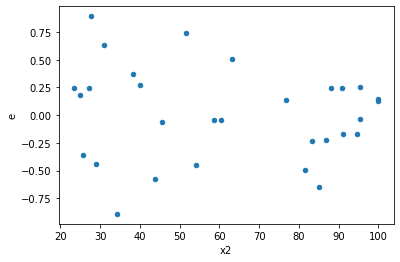

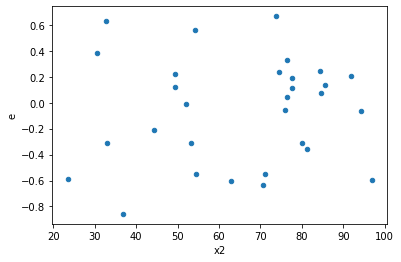

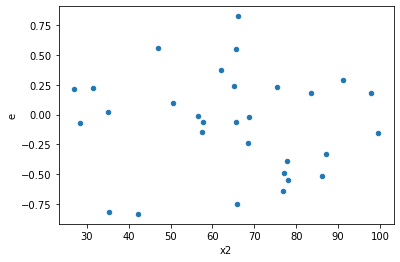

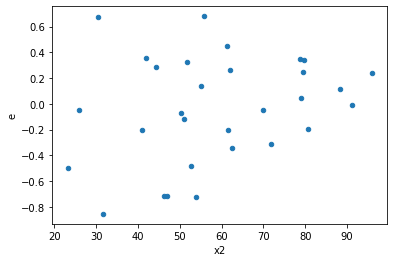

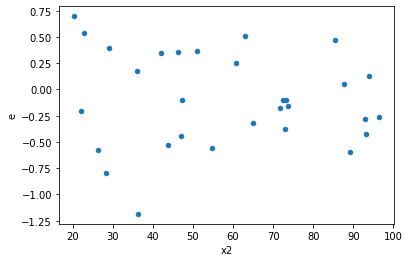

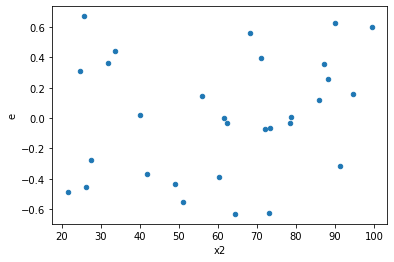

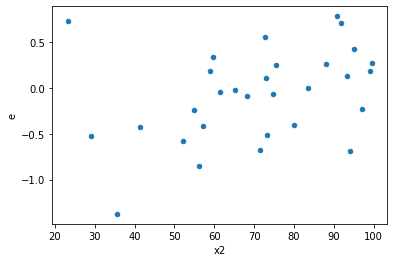

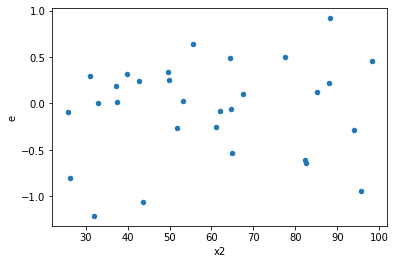

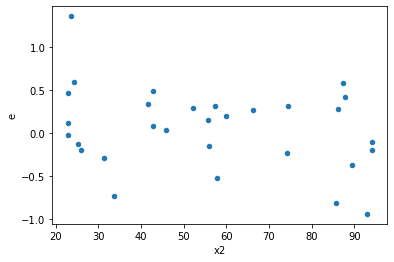

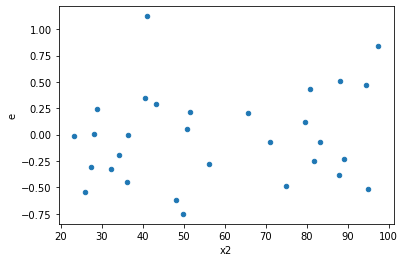

In [12]:
tablenew0 = table.loc[10.0]
tablenew1 = table.loc[11.0]
tablenew2 = table.loc[12.0]
tablenew3 = table.loc[13.0]
tablenew4 = table.loc[14.0]
tablenew5 = table.loc[15.0]
tablenew6 = table.loc[16.0]
tablenew7 = table.loc[17.0]
tablenew8 = table.loc[18.0]
tablenew9 = table.loc[19.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [13]:
def get_result(run_replicate, percent_data):
    new_table = table.loc[run_replicate]

    # เรียง data จากน้อยไปมากตาม x2
    new_table_sort = new_table.sort_values('x2')
    new_table_sort.reset_index(inplace=True)
    new_table_sort.drop(['index'], axis=1, inplace=True)


    # แบ่งข้อมูลกลุ่มที่ 1
    table1 = new_table_sort.iloc[:int(percent_data*new_table_sort.shape[0]) , :]
    y = table1['Y']
    x = table1[['x1', 'x2']]
    # add constant to predictor variable
    x = sm.add_constant(x)
    # fit linear regression model
    model1 = sm.OLS(y, x).fit()

    # หาค่า df กลุ่ม 1
    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1


    # แบ่งข้อมูลกลุ่มที่ 2
    table2 = new_table_sort.iloc[int((1-percent_data)*new_table_sort.shape[0]): , :]

    y = table2['Y']
    x = table2[['x1', 'x2']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()
    #print(model.summary())

    # หาค่า df กลุ่ม 2
    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # ค่าสถิติทดสอบ
    GQ_test = (SSE2/DF2) / (SSE1/DF1)


    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test, df2, df1)))
    p_greater = ss.f.cdf(GQ_test, df2, df1)
    p_less = 1.0-ss.f.cdf(GQ_test, df2, df1)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]

# กำหนด % การแบ่งข้อมูล
percent_data=0.4

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less=get_result(run_replicate, percent_data)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test.append(GQ_test)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
0.0,10.0,10.0,0.45721248418460403,2.5275656153311834,0.045721248418460404,0.2527565615331183,5.528207786886794,0.012354192472977976,0.993822903763511,0.006177096236488988,Reject005=0 : Heteroscedasticity
1.0,10.0,10.0,2.0028069936749144,2.2489657057612784,0.20028069936749143,0.22489657057612783,1.1229068566585598,0.85815751464748,0.57092124267626,0.42907875732374,Reject005=1 : Homoscedasticity
17.0,10.0,10.0,2.4637159147739944,3.170956207095043,0.24637159147739945,0.31709562070950426,1.2870624360868836,0.6975105412212577,0.6512447293893712,0.34875527061062883,Reject005=1 : Homoscedasticity
19.0,10.0,10.0,1.3906960365644574,1.6599354990974193,0.13906960365644574,0.16599354990974194,1.1936005104307945,0.7850451101844418,0.6074774449077791,0.3925225550922209,Reject005=1 : Homoscedasticity
21.0,10.0,10.0,1.54710402608384,1.7781545226333735,0.154710402608384,0.17781545226333734,1.149343866122815,0.8301014931951438,0.5849492534024281,0.4150507465975719,Reject005=1 : Homoscedasticity
25.0,10.0,10.0,1.2807394964717955,1.7078350771451583,0.12807394964717955,0.17078350771451584,1.3334757629087988,0.6577112647745427,0.6711443676127287,0.32885563238727133,Reject005=1 : Homoscedasticity
26.0,10.0,10.0,2.2274936891774684,2.5641795947133352,0.22274936891774683,0.2564179594713335,1.1511501052378705,0.828215992232032,0.585892003883984,0.414107996116016,Reject005=1 : Homoscedasticity
28.0,10.0,10.0,1.263179309014207,1.2855265931332909,0.12631793090142068,0.1285526593133291,1.0176913000075374,0.9784244888682958,0.5107877555658521,0.4892122444341479,Reject005=1 : Homoscedasticity
31.0,10.0,10.0,2.219649996877234,3.4942555183458057,0.2219649996877234,0.34942555183458057,1.5742371649862725,0.48586611859407847,0.7570669407029608,0.24293305929703923,Reject005=1 : Homoscedasticity


In [15]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

#result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,10.0,10.0,0.45721248418460403,2.5275656153311834,0.045721248418460404,0.2527565615331183,5.528207786886794,0.012354192472977976,Reject005=0 : Heteroscedasticity
1.0,10.0,10.0,2.0028069936749144,2.2489657057612784,0.20028069936749143,0.22489657057612783,1.1229068566585598,0.85815751464748,Reject005=1 : Homoscedasticity
2.0,10.0,10.0,3.306709269927726,1.2194994835493749,0.3306709269927726,0.12194994835493748,0.36879549546127144,0.13132583713583837,Reject005=1 : Homoscedasticity
3.0,10.0,10.0,3.788729155851694,1.918854016707102,0.3788729155851694,0.1918854016707102,0.5064637607424196,0.29855625609077413,Reject005=1 : Homoscedasticity
4.0,10.0,10.0,2.3464020459393207,1.0197819043656444,0.23464020459393206,0.10197819043656445,0.4346151615962308,0.2049248480728928,Reject005=1 : Homoscedasticity
5.0,10.0,10.0,2.765519726469793,1.3066541580586049,0.2765519726469793,0.1306654158058605,0.4724805054008995,0.2528460326055438,Reject005=1 : Homoscedasticity
6.0,10.0,10.0,3.3142704183312013,2.360020909000063,0.3314270418331201,0.2360020909000063,0.7120785606228169,0.6013564832845372,Reject005=1 : Homoscedasticity
7.0,10.0,10.0,1.76733966365319,0.7232113640061637,0.176733966365319,0.07232113640061637,0.4092090382395681,0.17491010021397574,Reject005=1 : Homoscedasticity
8.0,10.0,10.0,2.7622990801175145,2.277047824803977,0.27622990801175146,0.22770478248039772,0.8243306603523564,0.7659355186166437,Reject005=1 : Homoscedasticity


In [16]:
result_show['Result_test'].value_counts()

Reject005=1 : Homoscedasticity      890
Reject005=0 : Heteroscedasticity    110
Name: Result_test, dtype: int64